*Reference*: https://www.kaggle.com/irinahulea/covid-19-vaccination-progress-eda-predictions/
## Project Objectives
- What vaccines are used and in which countries?
- What country is vaccinated more people?
- What country is vaccinated a larger percent from its population?
- Make predictions about when countries will reach 25%, 50% and 70% of the population vaccination thresholds
- Attempt to work with live data from Google API

## Importing packages

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
#from fbprophet import Prophet
#from fbprophet.plot import plot_plotly
#pd.set_option('display.float_format', lambda x: '%.2f' % x)
#import geopandas as gpd

## Importing and merging data

In [81]:
#reading in country vaccination data
vaccinations = pd.read_csv('country_vaccinations.csv')
vaccinations.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/


In [82]:
vaccinations.shape

(29412, 15)

In [83]:
#keeping useful columns and eliminating the rest
vaccinations = vaccinations[['date', 
                             'country', 
                             'iso_code', 
                             'daily_vaccinations', 
                             'people_vaccinated_per_hundred', 
                             'people_fully_vaccinated',
                             'vaccines',
                            ]]
vaccinations.head()

,date,country,iso_code,daily_vaccinations,people_vaccinated_per_hundred,people_fully_vaccinated,vaccines
0,2021-02-22,Afghanistan,AFG,NaN,0.0,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
1,2021-02-23,Afghanistan,AFG,1367.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
2,2021-02-24,Afghanistan,AFG,1367.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
3,2021-02-25,Afghanistan,AFG,1367.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
4,2021-02-26,Afghanistan,AFG,1367.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."


In [84]:
#checking for categorical NaN's
vaccinations.select_dtypes(include=['object']).isnull().sum()

date        0
country     0
iso_code    0
vaccines    0
dtype: int64

In [85]:
#fixing iso codes of UK countries
vaccinations.loc[vaccinations.country.isin(['England', 'Scotland', 'Wales', 'Northern Ireland']), 'iso_code'] = 'GBR'

In [86]:
#reading in continent data, with the intent of adding regional/sub-regional data
continents = pd.read_csv('continents2.csv')
continents.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [87]:
#merging regional/sub-regional data with country vaccinations data
#iso_code column of vaccinations corresponds to alpha-3 columsn of continents
data = vaccinations.merge(continents[['alpha-3', 'region', 'sub-region']],
                          how='left',
                          left_on = 'iso_code',
                          right_on = 'alpha-3',
                         ).drop(columns=['alpha-3'])
data.head()

,date,country,iso_code,daily_vaccinations,people_vaccinated_per_hundred,people_fully_vaccinated,vaccines,region,sub-region
0,2021-02-22,Afghanistan,AFG,NaN,0.0,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",Asia,Southern Asia
1,2021-02-23,Afghanistan,AFG,1367.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",Asia,Southern Asia
2,2021-02-24,Afghanistan,AFG,1367.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",Asia,Southern Asia
3,2021-02-25,Afghanistan,AFG,1367.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",Asia,Southern Asia
4,2021-02-26,Afghanistan,AFG,1367.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",Asia,Southern Asia


In [88]:
#renaming columns
#data.columns = ['date', 'country', 'iso_code', 'daily_vaccinations', 'people_vaccinated_per_hundred', 'vaccines', 
#                'continent', 'region']
data.rename(columns = {"region":"continent", "sub-region":"region"}, inplace=True)
data.head()

,date,country,iso_code,daily_vaccinations,people_vaccinated_per_hundred,people_fully_vaccinated,vaccines,continent,region
0,2021-02-22,Afghanistan,AFG,NaN,0.0,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",Asia,Southern Asia
1,2021-02-23,Afghanistan,AFG,1367.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",Asia,Southern Asia
2,2021-02-24,Afghanistan,AFG,1367.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",Asia,Southern Asia
3,2021-02-25,Afghanistan,AFG,1367.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",Asia,Southern Asia
4,2021-02-26,Afghanistan,AFG,1367.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",Asia,Southern Asia


In [89]:
#split the Americas into North America and South America, and rename Oceania into Australia and Oceania
data.continent.value_counts()

Europe      9354
Asia        6953
Americas    6260
Africa      5308
Oceania     1308
Name: continent, dtype: int64

In [90]:
data.loc[data.region == 'Northern America', 'continent'] = 'North America'
data.loc[data.region == 'Latin America and the Caribbean', 'continent'] = 'South America'

In [91]:
data.loc[data.continent == 'Oceania', 'continent'] = 'Australia and Oceania'

In [92]:
data.continent.value_counts()

Europe                   9354
Asia                     6953
South America            5520
Africa                   5308
Australia and Oceania    1308
North America             740
Name: continent, dtype: int64

In [93]:
#saving progress
data.to_pickle("vaccinations_merged.pkl")

## Dealing with missing values

In [94]:
data = pd.read_pickle("vaccinations_merged.pkl")

In [95]:
data.isnull().sum()

date                                 0
country                              0
iso_code                             0
daily_vaccinations                 241
people_vaccinated_per_hundred    13851
people_fully_vaccinated          16582
vaccines                             0
continent                          229
region                             229
dtype: int64

In [96]:
data.loc[data.continent.isnull(), 'iso_code'].value_counts()

OWID_CYN    134
OWID_KOS     95
Name: iso_code, dtype: int64

### Missing values: continent/region

In [97]:
#we're missing continent/region for Northern Cyprus and Kosovo.
data.loc[data.country == 'Northern Cyprus', 'continent'] = 'Europe'
data.loc[data.country == 'Northern Cyprus', 'region'] = 'Southern Europe'

data.loc[data.country == 'Kosovo', 'continent'] = 'Asia'
data.loc[data.country == 'Kosovo', 'region'] = 'Western Asia'

In [98]:
#missing values for continent/region have been eliminated.
data.isnull().sum()

date                                 0
country                              0
iso_code                             0
daily_vaccinations                 241
people_vaccinated_per_hundred    13851
people_fully_vaccinated          16582
vaccines                             0
continent                            0
region                               0
dtype: int64

### Missing values: daily_vaccinations

In [99]:
#since missing values for daily_vaccinations makes up a very small percentage of the data...
data.loc[data.daily_vaccinations.isnull()].shape[0] / data.shape[0]

0.008193934448524412

In [100]:
#I'm going to choose to delete those rows.
data = data[~data.daily_vaccinations.isnull()]

### Missing values: people_vaccinated_per_hundred

In [101]:
#people_vaccinated_per_hundred is more problematic, however. 
data.loc[data.people_vaccinated_per_hundred.isnull()].shape[0] / data.shape[0]

0.47410099070995165

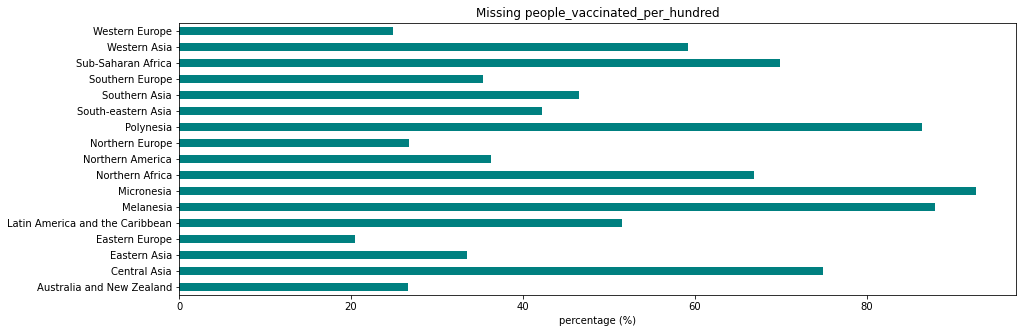

In [102]:
#visualizing percentage of missing people_vaccinated_per_hundred data by region
(data[data.people_vaccinated_per_hundred.isnull()].region.value_counts() / data.region.value_counts()
).mul(100).plot.barh(color="teal", figsize=(15,5))

plt.title('Missing people_vaccinated_per_hundred')
plt.xlabel('percentage (%)')
plt.show()

In [103]:
#for countries that have people_vaccinated_per_hundred data at some point, we'll replace its missing values with the most recent
data.sort_values(by='date', inplace=True)
all_countries = list(data.country.unique())

for country in all_countries:
    data.loc[data.country == country, 'people_vaccinated_per_hundred'] = \
    data.loc[data.country == country, 'people_vaccinated_per_hundred'].fillna(method='bfill').fillna(method='ffill')

In [104]:
#cool, we've eliminated all missing values for people_vaccinated_per_hundred,
#replacing them with the most recent data we could find
data.loc[data.people_vaccinated_per_hundred.isnull()].shape[0] / data.shape[0]

0.0

### Missing values: people_fully_vaccinated

In [105]:
#same treatment for people_fully_vaccinated
data.sort_values(by='date', inplace=True)
all_countries = list(data.country.unique())

for country in all_countries:
    data.loc[data.country == country, 'people_fully_vaccinated'] = \
    data.loc[data.country == country, 'people_fully_vaccinated'].fillna(method='bfill').fillna(method='ffill')

In [106]:
#we've narrowed missing people_fully_vaccinated values down to <4%. Since we're not going to take
#averages on this column, we can keep these remaining missing values.
data.loc[data.people_fully_vaccinated.isnull()].shape[0] / data.shape[0]

0.035549004147955164

In [107]:
data.isnull().sum()

date                                0
country                             0
iso_code                            0
daily_vaccinations                  0
people_vaccinated_per_hundred       0
people_fully_vaccinated          1037
vaccines                            0
continent                           0
region                              0
dtype: int64

In [108]:
#saving progress
data.to_pickle("vaccinations_cleaned.pkl")

## Data Analysis

In [109]:
data = pd.read_pickle("vaccinations_cleaned.pkl")

# Which country uses which vaccine(s)?

In [129]:
data.vaccines.value_counts() # first element is the most frequently-occurring element

Oxford/AstraZeneca                                                                             4526
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                  3899
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                                   2542
Oxford/AstraZeneca, Sinopharm/Beijing                                                          2083
Oxford/AstraZeneca, Pfizer/BioNTech                                                            1959
Moderna, Pfizer/BioNTech                                                                       1361
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V                              1350
Pfizer/BioNTech                                                                                1280
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac                                                   1139
Oxford/AstraZeneca, Sputnik V                                                                   604


In [160]:
# number of rows equal to the number of countries in the dataset.
df = data[['iso_code', 'vaccines']].drop_duplicates()
df.shape

(211, 2)

In [131]:
data.iso_code.unique().shape

(211,)

Text(0.5, 1.0, 'What vaccines are used in the world?')

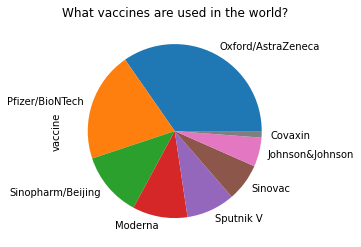

In [216]:
#data for plotting

#create dataframe with one record for each country and type of vaccine used
map_plot_df = pd.concat([pd.Series(row['iso_code'], row['vaccines'].split(','))              
                         for _, row in df.iterrows()]).reset_index()
#print(map_plot_df)

#current column names are index and 0
#rename columns
map_plot_df.columns = ['vaccine', 'iso_code']

#strip white spaces
map_plot_df['vaccine'] = map_plot_df['vaccine'].str.strip(' ')

#print(map_plot_df)

map_plot_df.vaccine.value_counts()
#print(map_plot_df.vaccine.value_counts())

#should we plot the most frequent vaccine?
vaccine_pie = map_plot_df.vaccine.value_counts().loc[lambda x: x > 4].plot(kind='pie') # eight vaccines
#add title
vaccine_pie.set_title("What vaccines are used in the world?")

In [215]:
vaccine_pie_two = map_plot_df.vaccine.value_counts()
print(vaccine_pie_two.index)
print(vaccine_pie_two)

Index(['Oxford/AstraZeneca', 'Pfizer/BioNTech', 'Sinopharm/Beijing', 'Moderna',
       'Sputnik V', 'Sinovac', 'Johnson&Johnson', 'Covaxin', 'CanSino',
       'Sinopharm/Wuhan', 'QazVac', 'Abdala', 'EpiVacCorona', 'Soberana02',
       'RBD-Dimer', 'Sinopharm/HayatVax'],
      dtype='object')
Oxford/AstraZeneca    173
Pfizer/BioNTech       102
Sinopharm/Beijing      60
Moderna                51
Sputnik V              45
Sinovac                35
Johnson&Johnson        27
Covaxin                 6
CanSino                 4
Sinopharm/Wuhan         2
QazVac                  1
Abdala                  1
EpiVacCorona            1
Soberana02              1
RBD-Dimer               1
Sinopharm/HayatVax      1
Name: vaccine, dtype: int64


In [218]:
# plotting, using plotly
fig = px.choropleth(locations = map_plot_df.iso_code, 
                    color = map_plot_df.vaccine,
                    color_continuous_scale = 'rainbow',
                    title = 'Where is each vaccine used?', 
                   )
fig.show()
#unknown error: it does not show up for me

### Predicting population vaccination percentages using fbprophet time-series model

In [38]:
#defining a function to make a timeseries prediction
def fbprophet_predict_and_plot(data, region_column, region, vaccination_metric, 
                               min_date = '2020-12-13', max_date='2021-07-06', future_days=10, plot=True):
    df = data[(data[region_column] == region) & (data.date <= max_date) & (data.date >= min_date)]
    df = df[['date', vaccination_metric]]
    df.columns = ['ds', 'y']
    model = Prophet(interval_width = 0.95)
    model.fit(df)
    future = model.make_future_dataframe(periods=future_days)
    forecast = model.predict(future)
    if plot:
        fig = plot_plotly(model, forecast)
        fig.show()
    else:
        return forecast

In [66]:
#China, India, US, Indonesia, Pakistan
fbprophet_predict_and_plot(data = data, 
                           region_column = 'country',
                           region = 'South Korea',
                           vaccination_metric = 'people_vaccinated_per_hundred',
                           future_days = 70,
                          )

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
